<a href="https://colab.research.google.com/github/kaustav02github/Diabrtes_nn/blob/main/Diabetes_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U imbalanced-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.columns[0]

'Pregnancies'

In [7]:
df[df['Outcome']==1]['Pregnancies']

,Pregnancies
0,6
2,8
4,0
6,3
8,2
...,...
755,1
757,0
759,6
761,9


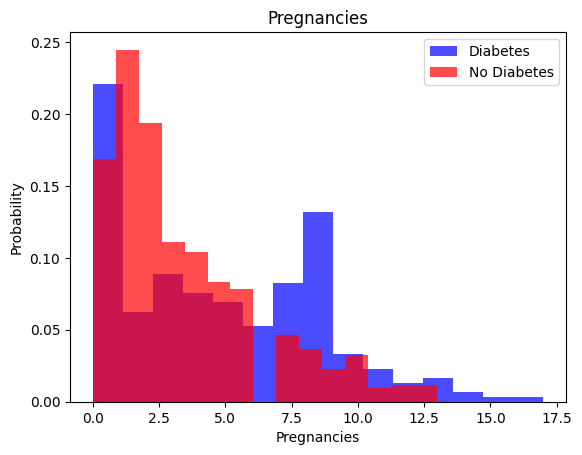

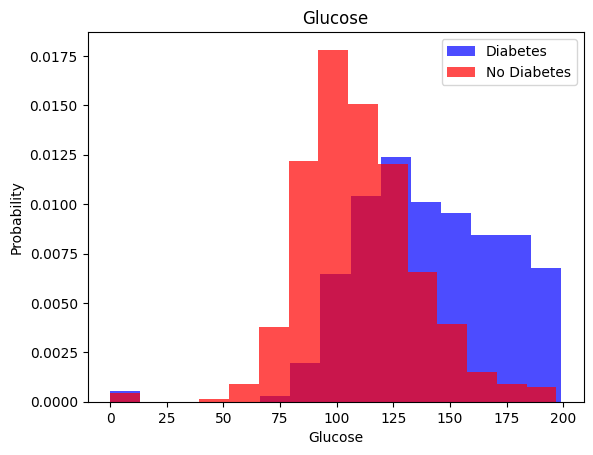

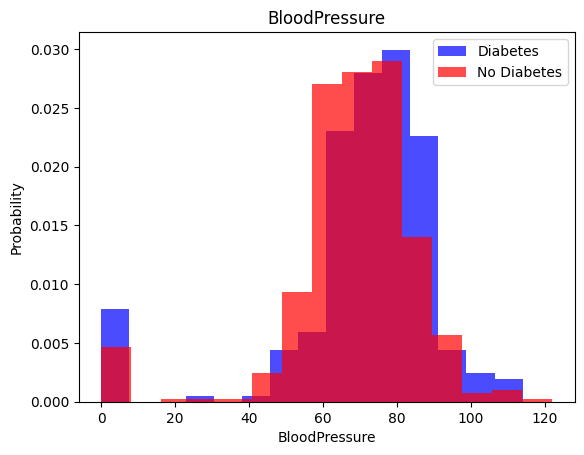

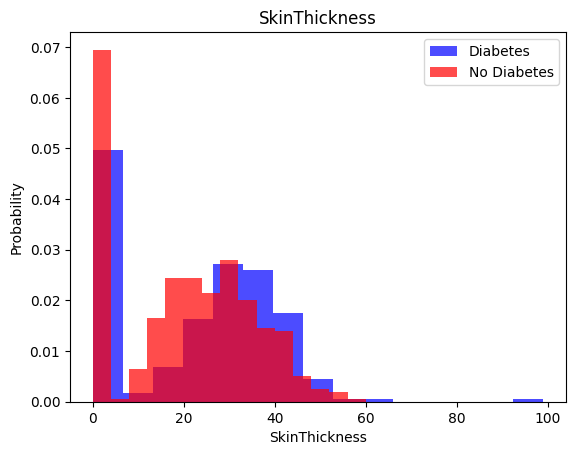

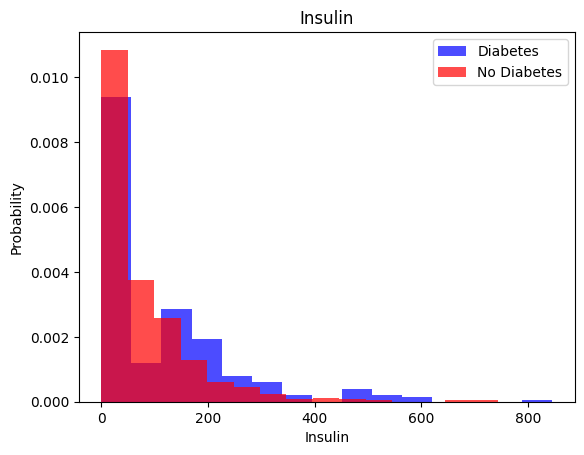

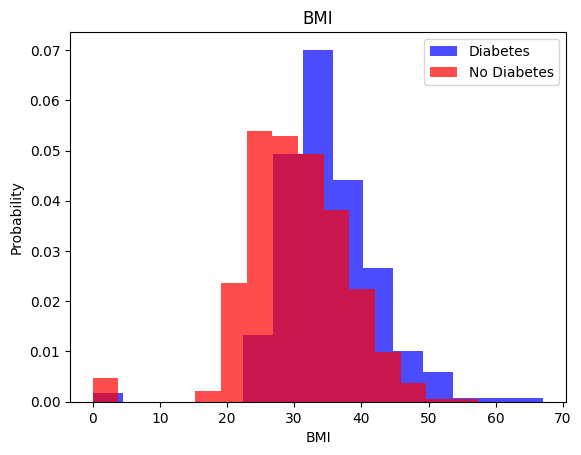

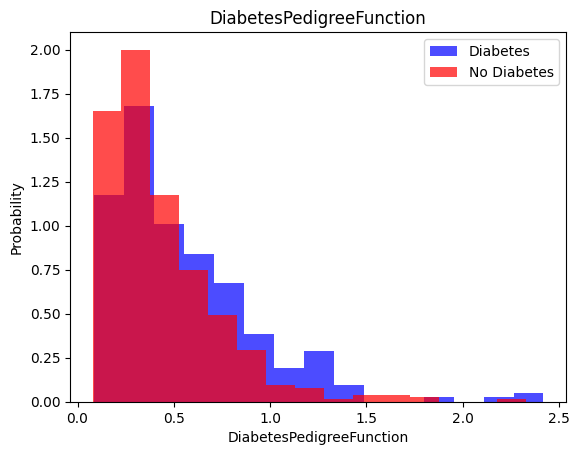

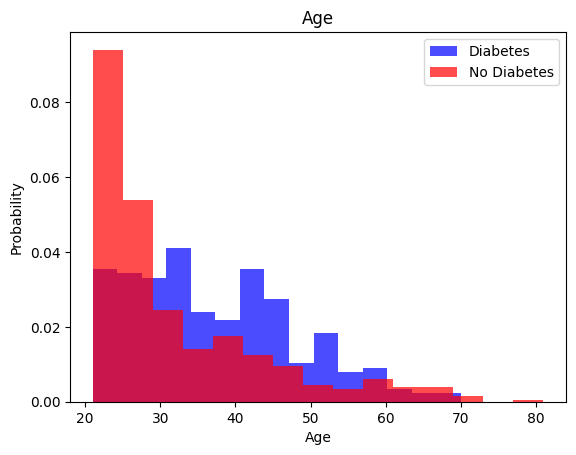

In [8]:
for i in range (len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',density=True,label='Diabetes',bins=15,alpha=0.7)
  plt.hist(df[df['Outcome']==0][label],color='red',density=True,label='No Diabetes',bins=15,alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

# ***.values converts it to a numpy array ***

In [9]:
X = df[df.columns[:-1]].values #all the columns except the last one
y = df[df.columns[-1]].values #only the last column i.e the "Outcome"

In [10]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
X.shape, y.shape

((768, 8), (768,))

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [13]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [22]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])


(500, 500)

Explanation of the Code Snippet
This code snippet is using the train_test_split function from the sklearn.model_selection module to split the data into training, validation, and testing sets. This is a crucial step in machine learning to evaluate the performance of a model on unseen data.

Let's break it down step-by-step:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)

This line splits the dataset (X and y) into two parts: a training set and a temporary set.
X: Represents the features of the dataset.
y: Represents the target variable (what we're trying to predict).
test_size=0.4: Indicates that 40% of the data will be allocated to the temporary set (X_temp, y_temp), and the remaining 60% will be allocated to the training set (X_train, y_train).
random_state=0: Ensures that the data is split in the same way every time the code is run, making the results reproducible.
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

This line further splits the temporary set (X_temp, y_temp) into two parts: a validation set and a testing set.
test_size=0.5: Indicates that 50% of the temporary set will be allocated to the testing set (X_test, y_test), and the remaining 50% will be allocated to the validation set (X_valid, y_valid).
random_state=0: Again, ensures reproducibility.
In essence, this code divides the original dataset into three parts:

Training set (X_train, y_train): Used to train the machine learning model. (60% of the original data)
Validation set (X_valid, y_valid): Used to tune the hyperparameters of the model and evaluate its performance during training. (20% of the original data)
Testing set (X_test, y_test): Used to evaluate the final performance of the model on unseen data. (20% of the original data)
This splitting strategy is crucial for building robust and reliable machine learning models.

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4966 - loss: 0.7016


[0.7051382064819336, 0.5049999952316284]

In [19]:
model.evaluate(X_valid,y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4141 - loss: 0.7384


[0.7236812710762024, 0.46000000834465027]

In [20]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5450 - loss: 0.6925 - val_accuracy: 0.6150 - val_loss: 0.6529
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6876 - loss: 0.6314 - val_accuracy: 0.6900 - val_loss: 0.6000
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7370 - loss: 0.5939 - val_accuracy: 0.7050 - val_loss: 0.5648
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7402 - loss: 0.5520 - val_accuracy: 0.7100 - val_loss: 0.5363
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7414 - loss: 0.5398 - val_accuracy: 0.7350 - val_loss: 0.5106
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7750 - loss: 0.5079 - val_accuracy: 0.7500 - val_loss: 0.4945
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7516 - loss: 0.5115 - val_accuracy: 0.7450 - val_loss: 0.4803
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7765 - loss: 0.4881 - val_accuracy: 0.7550 - val_lo

In [21]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8000 - loss: 0.4434 


[0.46241873502731323, 0.7850000262260437]